<a href="https://colab.research.google.com/github/wiv33/A-Learning-python/blob/master/machine-learning/_000_hello_machine/_000_basic/_003_tensorflow_cuk_edu/_002_2_ml/_002_weather_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기상청 날씨 데이터 분석하기

## 데이터 불러오기

- 컬럼 설정
- 사람을 위한 월 시작 row 제거
  - 12월 31일 -> | start: 201912 | -> 1월 1일

In [191]:
import pandas as pd
path = 'https://raw.githubusercontent.com/wiv33/A-Learning-python/master/machine-learning/_000_hello_machine/_000_basic/_003_tensorflow_cuk_edu/_002_2_ml/data'

df_precipitation = pd.read_csv(path + '/precipitation_201910_202009.csv')
df_precipitation.columns = ['day', 'hour', 'precipitation']
df_precipitation.dropna(axis=0, inplace=True)

df_direction_of_the_wind = pd.read_csv(path + '/direction_of_the_wind_201910_202009.csv')
df_direction_of_the_wind.columns = ['day', 'hour', 'wind']
df_direction_of_the_wind.dropna(axis=0, inplace=True)

df_precipitation_shape = pd.read_csv(path + '/precipitation_shape_201910_202009.csv')
df_precipitation_shape.columns = ['day', 'hour', 'precipitation_shape']
df_precipitation_shape.dropna(axis=0, inplace=True)

df_temperature = pd.read_csv(path + '/temperature_201910_202009.csv')
df_temperature.columns = ['day', 'hour', 'temperature'] 
df_temperature.dropna(axis=0, inplace=True)

df_humidity = pd.read_csv(path + '/humidity_201910_202009.csv')
df_humidity.columns = ['day', 'hour', 'humidity']
df_humidity.dropna(axis=0, inplace=True)

df_wind_spped = pd.read_csv(path + '/%EC%9B%94%EA%B3%A1%EC%A0%9C1%EB%8F%99_%ED%92%8D%EC%86%8D_wind_speed_201910_202009.csv')
df_wind_spped.columns = ['day', 'hour', 'wind_speed']
df_wind_spped.dropna(axis=0, inplace=True)


nan row 확인

In [192]:
df_test = pd.read_csv(path + '/temperature_201910_202009.csv')
# df_test.iloc[3318:3340, :]

In [193]:
df_test2 = pd.read_csv(path + '/precipitation_shape_201910_202009.csv')
# df_test2.iloc[3318:3340, :]

In [194]:
df_test3 = pd.read_csv(path + '/precipitation_201910_202009.csv')
# df_test3.iloc[3318:3340, :]

In [195]:
df_test4 = pd.read_csv(path + '/precipitation_201910_202009.csv')
df_test4.columns = ['day', 'hour', 'precipitation']
df_test4.head()



,day,hour,precipitation
0,1,0.0,0.0
1,1,100.0,0.0
2,1,200.0,0.0
3,1,300.0,0.0
4,1,400.0,0.0


In [196]:
df_date_test4 = pd.date_range('2019-10-01', periods=366)
df_date_test4

DatetimeIndex(['2019-10-01', '2019-10-02', '2019-10-03', '2019-10-04',
               '2019-10-05', '2019-10-06', '2019-10-07', '2019-10-08',
               '2019-10-09', '2019-10-10',
               ...
               '2020-09-21', '2020-09-22', '2020-09-23', '2020-09-24',
               '2020-09-25', '2020-09-26', '2020-09-27', '2020-09-28',
               '2020-09-29', '2020-09-30'],
              dtype='datetime64[ns]', length=366, freq='D')

nan 형태 확인 후 제거

In [197]:
del df_test
del df_test2
del df_test3
del df_date_test4

### 다섯 개의 DataFrame shape 확인하기

In [198]:
df_direction_of_the_wind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 0 to 8794
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     8784 non-null   object 
 1   hour    8784 non-null   float64
 2   wind    8784 non-null   float64
dtypes: float64(2), object(1)
memory usage: 274.5+ KB


In [199]:
df_precipitation_shape.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 0 to 8794
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   day                  8784 non-null   object 
 1   hour                 8784 non-null   float64
 2   precipitation_shape  8784 non-null   float64
dtypes: float64(2), object(1)
memory usage: 274.5+ KB


In [200]:
df_humidity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 0 to 8794
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   day       8784 non-null   object 
 1   hour      8784 non-null   float64
 2   humidity  8784 non-null   float64
dtypes: float64(2), object(1)
memory usage: 274.5+ KB


In [201]:
df_temperature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 0 to 8794
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          8784 non-null   object 
 1   hour         8784 non-null   float64
 2   temperature  8784 non-null   float64
dtypes: float64(2), object(1)
memory usage: 274.5+ KB


8784 row와 3개의 컬럼 중 세 번째 컬럼을 하나로 만들면 될 것.

## 각 데이터 프레임 하나로 합치기

강수, 강수형태, 습도, 기온, 풍향, 풍속

In [202]:
df = df_precipitation.iloc[:, :2]
df['precipitation_강수'] = df_precipitation.precipitation
df['precipitation_shape_강수형태'] = df_precipitation_shape['precipitation_shape']
df['temperature_기온'] = df_temperature['temperature']
df['humidity_습도'] = df_humidity.humidity
df['wind_풍향'] = df_direction_of_the_wind.wind
df['wind_spped_풍속'] = df_wind_spped.wind_speed


### merge 결과 확인하기

In [203]:
df.head()

,day,hour,precipitation_강수,precipitation_shape_강수형태,temperature_기온,humidity_습도,wind_풍향,wind_spped_풍속
0,1,0.0,0.0,0.0,23.900000,63.0,29.0,0.8
1,1,100.0,0.0,0.0,25.400000,60.0,183.0,1.6
2,1,200.0,0.0,0.0,26.799999,56.0,122.0,1.6
3,1,300.0,0.0,0.0,26.799999,57.0,64.0,1.9
4,1,400.0,0.0,0.0,27.400000,59.0,127.0,1.5


## 시간 데이터 타입 변환

- 기존 24시의 표현 변경

  0.0, 100.0, 200.0

  0, 1, 2, 3

- ~~day int로 변경~~
- day를 datetime 형식으로 변경.

시각화할 때 구분이 가지 않음.


In [204]:
def hour_regulation(hour: float):
  return int(hour / 100)

In [205]:
df_day_idx = pd.date_range('2019-10-01', periods=366)

In [206]:
dates = [[str(day).split("T")[0]] * 24 for day in df_day_idx.values]
len(np.array(dates).flatten())

8784

In [221]:
df.hour = df.hour.apply(hour_regulation)
df.index = np.array(dates).flatten()
df.day = df.day.apply(lambda x: int(x))

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8784 entries, 2019-10-01 to 2020-09-30
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   day                       8784 non-null   int64  
 1   hour                      8784 non-null   int64  
 2   precipitation_강수          8784 non-null   float64
 3   precipitation_shape_강수형태  8784 non-null   float64
 4   temperature_기온            8784 non-null   float64
 5   humidity_습도               8784 non-null   float64
 6   wind_풍향                   8784 non-null   float64
 7   wind_spped_풍속             8784 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 617.6+ KB


In [222]:
df.describe()

,day,hour,precipitation_강수,precipitation_shape_강수형태,temperature_기온,humidity_습도,wind_풍향,wind_spped_풍속
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,15.756831,11.500000,0.196949,0.062614,14.088300,64.937642,204.207536,1.900979
std,8.812031,6.922581,1.323931,0.259086,9.784082,20.315112,120.908576,1.218408
min,1.000000,0.000000,0.000000,0.000000,-12.150000,10.000000,0.000000,0.000000
25%,8.000000,5.750000,0.000000,0.000000,5.800000,50.000000,82.000000,1.000000
50%,16.000000,11.500000,0.000000,0.000000,14.500000,65.000000,239.000000,1.600000
75%,23.000000,17.250000,0.000000,0.000000,22.700001,82.000000,314.000000,2.600000
max,31.000000,23.000000,43.000000,3.000000,36.700001,97.000000,360.000000,12.800000


### 이상 데이터 확인

강수, 강수 형태, 습도, 풍향, 풍속의 최소 값이 `-1`이고

기온이 `-50도`인 것은 정규화가 필요하다고 판단.

In [208]:
df[df['temperature_기온'] == -50].index

Int64Index([514, 1057, 2271, 3468, 3475, 3481, 4183, 4661, 5487], dtype='int64')

- 이상 데이터의 인덱스 확인

### 이상 데이터 정규화

- 습도와 기온은 +-2일 값의 평균으로 적용
- 나머지 값은 0으로 적용

In [223]:
import numpy as np 

for x in df[df['wind_풍향'] <= -1].index:
  seq = int(x)
  df['temperature_기온'][seq] = np.mean((df.iloc[seq-2:seq, 4], df.iloc[seq+1:seq+3, 4]))
  df['humidity_습도'][seq] = np.mean((df.iloc[seq-2:seq, 5], df.iloc[seq+1:seq+3, 5]))
  df['wind_spped_풍속'][seq] = 0.0
  df['precipitation_shape_강수형태'][seq] = 0.0
  df['precipitation_강수'][seq] = 0.0
  df['wind_풍향'][seq] = 0.0


In [210]:
df[df['humidity_습도'] <= 10.0]

,day,hour,precipitation_강수,precipitation_shape_강수형태,temperature_기온,humidity_습도,wind_풍향,wind_spped_풍속
5291,8,400.0,0.0,0.0,26.1,10.0,136.0,2.5


In [211]:
df[df['temperature_기온'] <= -50]

,day,hour,precipitation_강수,precipitation_shape_강수형태,temperature_기온,humidity_습도,wind_풍향,wind_spped_풍속


In [212]:
df.iloc[1055: 1057, :]

,day,hour,precipitation_강수,precipitation_shape_강수형태,temperature_기온,humidity_습도,wind_풍향,wind_spped_풍속
1056,13,2300.0,0.0,0.0,0.40,24.00,2.0,3.2
1057,14,0.0,0.0,0.0,-10.55,21.25,0.0,0.0


In [213]:
df[df['wind_풍향'] <= -1]

,day,hour,precipitation_강수,precipitation_shape_강수형태,temperature_기온,humidity_습도,wind_풍향,wind_spped_풍속


In [214]:
df.describe()

,hour,precipitation_강수,precipitation_shape_강수형태,temperature_기온,humidity_습도,wind_풍향,wind_spped_풍속
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,1150.000000,0.196949,0.062614,14.088300,64.937642,204.207536,1.900979
std,692.258061,1.323931,0.259086,9.784082,20.315112,120.908576,1.218408
min,0.000000,0.000000,0.000000,-12.150000,10.000000,0.000000,0.000000
25%,575.000000,0.000000,0.000000,5.800000,50.000000,82.000000,1.000000
50%,1150.000000,0.000000,0.000000,14.500000,65.000000,239.000000,1.600000
75%,1725.000000,0.000000,0.000000,22.700001,82.000000,314.000000,2.600000
max,2300.000000,43.000000,3.000000,36.700001,97.000000,360.000000,12.800000


In [215]:
df[df['precipitation_shape_강수형태'] == 3.]

,day,hour,precipitation_강수,precipitation_shape_강수형태,temperature_기온,humidity_습도,wind_풍향,wind_spped_풍속
2332,6,100.0,0.0,3.0,4.0,53.0,87.0,0.6
3035,4,700.0,0.0,3.0,1.7,86.0,224.0,3.3
3039,4,1100.0,0.0,3.0,-1.0,77.0,316.0,5.6
3318,16,200.0,0.0,3.0,-0.3,81.0,261.0,2.9
3319,16,300.0,0.0,3.0,-0.2,80.0,248.0,3.4
3322,16,600.0,0.0,3.0,-0.8,68.0,287.0,6.1
3323,16,700.0,0.0,3.0,-1.8,76.0,280.0,4.5
3330,16,1400.0,0.0,3.0,-3.3,75.0,249.0,2.3
3332,16,1600.0,0.0,3.0,-3.6,84.0,281.0,1.8
3338,16,2200.0,0.0,3.0,-6.2,74.0,340.0,2.1


# 시각화

In [216]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## 시간에 따른 기온의 변화

In [217]:
df.head()

,day,hour,precipitation_강수,precipitation_shape_강수형태,temperature_기온,humidity_습도,wind_풍향,wind_spped_풍속
0,1,0.0,0.0,0.0,23.900000,63.0,29.0,0.8
1,1,100.0,0.0,0.0,25.400000,60.0,183.0,1.6
2,1,200.0,0.0,0.0,26.799999,56.0,122.0,1.6
3,1,300.0,0.0,0.0,26.799999,57.0,64.0,1.9
4,1,400.0,0.0,0.0,27.400000,59.0,127.0,1.5


In [218]:
df.tail()

,day,hour,precipitation_강수,precipitation_shape_강수형태,temperature_기온,humidity_습도,wind_풍향,wind_spped_풍속
8790,30,1900.0,0.0,0.0,17.000000,75.0,325.0,0.6
8791,30,2000.0,0.0,0.0,16.900000,77.0,344.0,0.6
8792,30,2100.0,0.0,0.0,17.400000,72.0,102.0,0.7
8793,30,2200.0,0.0,0.0,18.100000,70.0,82.0,1.1
8794,30,2300.0,0.0,0.0,18.799999,68.0,62.0,1.0


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0, flags=flags)


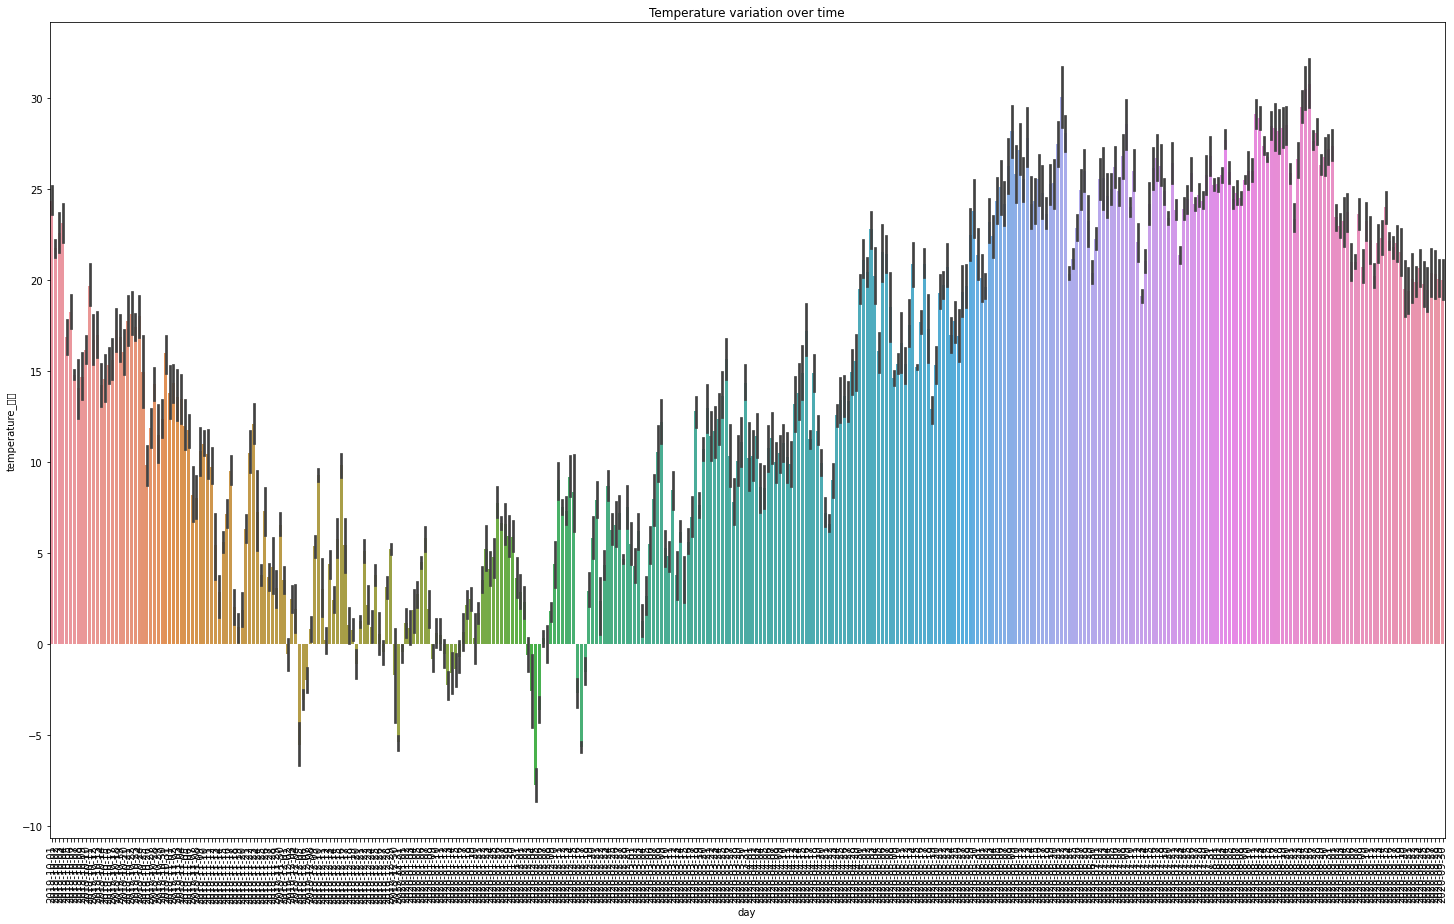

In [237]:
plt.figure(figsize=(25, 15))


plt.title('Temperature variation over time')
plt.xlabel('day')
plt.ylabel('temperature')
plt.xticks(rotation=90)
sns.barplot(x=df.index, y=df['temperature_기온'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0, flags=flags)


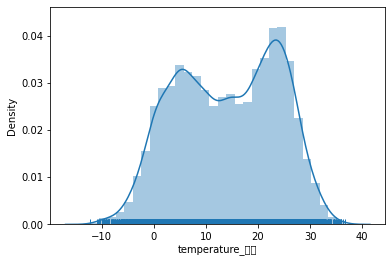

In [236]:
sns.distplot(df['temperature_기온'],
             hist=True,
             kde=True,
             rug=True)

In [226]:
df.head()

,day,hour,precipitation_강수,precipitation_shape_강수형태,temperature_기온,humidity_습도,wind_풍향,wind_spped_풍속
2019-10-01,1,0,0.0,0.0,23.900000,63.0,29.0,0.8
2019-10-01,1,1,0.0,0.0,25.400000,60.0,183.0,1.6
2019-10-01,1,2,0.0,0.0,26.799999,56.0,122.0,1.6
2019-10-01,1,3,0.0,0.0,26.799999,57.0,64.0,1.9
2019-10-01,1,4,0.0,0.0,27.400000,59.0,127.0,1.5
